In [2]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [3]:
!pip install ultralytics opencv-python pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 14.3 MB/s eta 0:00:00a 0:00:01


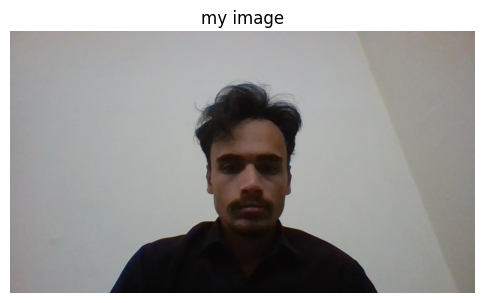

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image file
image_path = "/kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_45_Pro.jpg"

# Load the image
try:
    image = Image.open(image_path)
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("my image")
    plt.show()
except FileNotFoundError:
    print(f"File not found: {image_path}")


In [5]:
from ultralytics.data.annotator import auto_annotate

# Specify a writable output directory
output_dir = "/kaggle/working/"

auto_annotate(data="/kaggle/input/annotatemyimages/dataset", 
              det_model="yolo11n.pt", 
              sam_model="mobile_sam.pt", 
              output_dir=output_dir)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 72.8MB/s]


100%|██████████| 38.8M/38.8M [00:00<00:00, 222MB/s]



image 1/12 /kaggle/input/annotatemyimages/dataset/WIN_20241112_18_04_31_Pro.jpg: 384x640 1 person, 1 tie, 1 bed, 255.6ms
image 2/12 /kaggle/input/annotatemyimages/dataset/WIN_20241112_18_05_14_Pro.jpg: 384x640 1 person, 1 tie, 94.4ms
image 3/12 /kaggle/input/annotatemyimages/dataset/WIN_20241112_18_05_26_Pro.jpg: 384x640 1 person, 104.0ms
image 4/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_45_Pro.jpg: 384x640 1 person, 101.6ms
image 5/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_49_Pro.jpg: 384x640 1 person, 92.5ms
image 6/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_52_Pro.jpg: 384x640 1 person, 92.7ms
image 7/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_54_Pro.jpg: 384x640 1 person, 93.1ms
image 8/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_49_01_Pro.jpg: 384x640 1 person, 99.2ms
image 9/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_49_18_Pro.jpg: 384x640 1 person, 101.0ms
image 10/12 /kaggle/

In [4]:
from ultralytics.data.annotator import auto_annotate

# Specify a writable output directory
output_dir = "/kaggle/working/"

auto_annotate(data="/kaggle/input/annotatemyimages/dataset", 
              det_model="yolo11n.pt", 
              sam_model="mobile_sam.pt", 
              output_dir=output_dir)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 74.2MB/s]


100%|██████████| 38.8M/38.8M [00:00<00:00, 65.0MB/s]



image 1/12 /kaggle/input/annotatemyimages/dataset/WIN_20241112_18_04_31_Pro.jpg: 384x640 1 person, 1 tie, 1 bed, 84.7ms
image 2/12 /kaggle/input/annotatemyimages/dataset/WIN_20241112_18_05_14_Pro.jpg: 384x640 1 person, 1 tie, 9.1ms
image 3/12 /kaggle/input/annotatemyimages/dataset/WIN_20241112_18_05_26_Pro.jpg: 384x640 1 person, 8.0ms
image 4/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_45_Pro.jpg: 384x640 1 person, 7.9ms
image 5/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_49_Pro.jpg: 384x640 1 person, 8.5ms
image 6/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_52_Pro.jpg: 384x640 1 person, 8.0ms
image 7/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_54_Pro.jpg: 384x640 1 person, 8.2ms
image 8/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_49_01_Pro.jpg: 384x640 1 person, 8.3ms
image 9/12 /kaggle/input/annotatemyimages/dataset/WIN_20241129_19_49_18_Pro.jpg: 384x640 1 person, 8.3ms
image 10/12 /kaggle/input/annota

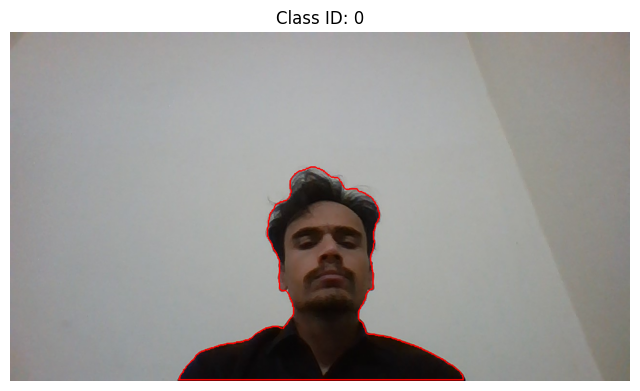

In [23]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Define paths
image_path = "/kaggle/input/annotatemyimages/dataset/WIN_20241129_19_48_52_Pro.jpg"
annotation_path = "/kaggle/working/WIN_20241129_19_48_52_Pro.txt"

try:
    # Load the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    width, height = image.size

    # Read the annotation file
    with open(annotation_path, "r") as file:
        annotation = file.read().strip()
    
    # Parse the annotation data
    data = annotation.split()
    class_id = int(data[0])  # Extract class ID
    points = list(map(float, data[1:]))  # Extract normalized polygon points

    # Convert normalized coordinates to absolute pixel values
    polygon = [(points[i] * width, points[i + 1] * height) for i in range(0, len(points), 2)]

    # Draw the polygon on the image
    draw.polygon(polygon, outline="red", width=3)

    # Display the image with annotations
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Class ID: {class_id}")
    plt.show()

except FileNotFoundError as e:
    print(f"File not found: {e}")


In [26]:
# Path to the text file
text_file_path = "/kaggle/working/WIN_20241129_19_50_33_Pro.txt"

# Read and display the contents of the text file
try:
    with open(text_file_path, "r") as file:
        contents = file.read()
        print("Contents of the file:")
        print(contents)
except FileNotFoundError:
    print(f"File not found: {text_file_path}")

Contents of the file:
0 0.5078125 0.22638888657093048 0.507031261920929 0.22777777910232544 0.49531251192092896 0.22777777910232544 0.4945312440395355 0.2291666716337204 0.4906249940395355 0.2291666716337204 0.4898437559604645 0.23055554926395416 0.4867187440395355 0.23055554926395416 0.4859375059604645 0.23194444179534912 0.484375 0.23194444179534912 0.48359376192092896 0.23333333432674408 0.4820312559604645 0.23333333432674408 0.48124998807907104 0.23472222685813904 0.48046875 0.23472222685813904 0.47968751192092896 0.2361111044883728 0.4781250059604645 0.2361111044883728 0.47734373807907104 0.23749999701976776 0.4765625 0.23749999701976776 0.47578126192092896 0.23888888955116272 0.4749999940395355 0.23888888955116272 0.4742187559604645 0.24027778208255768 0.47343748807907104 0.24027778208255768 0.47265625 0.24166665971279144 0.47187501192092896 0.24166665971279144 0.4710937440395355 0.2430555522441864 0.4703125059604645 0.2430555522441864 0.46953123807907104 0.24444444477558136 0.46